# Convolutional Neural Network (CNN) for MNIST Dataset by Sidharth Vinod (1936252)

### Background Information 
MNIST Dataset is a large dataset of handwritten digits (0-9) commonly used for training and testing in the field of machine learning.It contains 60,000 training and 10,000 testing images

**Importing the Necessary Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns
from keras.datasets import mnist  # Importing the MNIST Dateset
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import  AveragePooling2D
from keras.callbacks import ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import  RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix #Import confusion matrix
import itertools

## Data Preparation

*   **Load the data**



In [ ]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()
# Printing the shape of the X_train,y_train
# The height and the weight will be 28*28
print("X_train,",X_train.shape)
print("X_test,",X_test.shape)
print("Y_train,",y_train.shape)
print("Y_test, ",y_test.shape)

X_train, (60000, 28, 28)
X_test, (10000, 28, 28)
Y_train, (60000,)
Y_test,  (10000,)


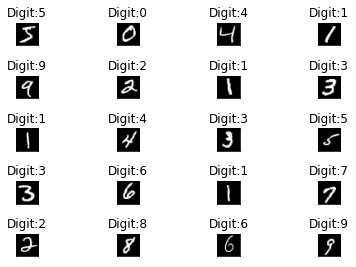

In [ ]:
# Lets plot the first 20 digits
def plotDigits(X,Y):
  for i in range(20):
    plt.subplot(5,4,i+1)
    plt.tight_layout()
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title('Digit:{}'.format(Y[i]))
    plt.xticks([])
    plt.yticks([])
  plt.show()
plotDigits(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


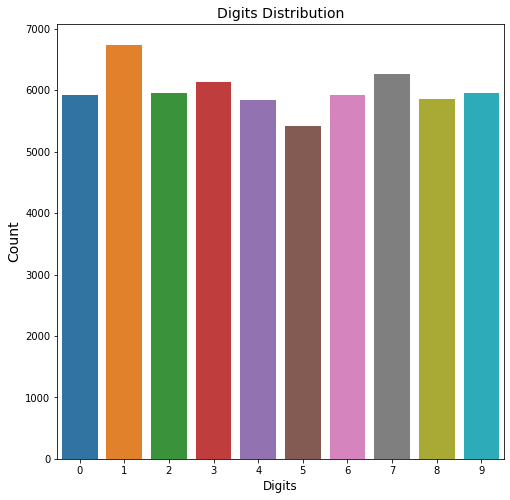

In [ ]:
# Distribution of the digits
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y_train)
ax.set_title('Digits Distribution', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

# MLP (Multi Layer Perceptron)

*   **First i will be building a basic neural network for MNIST dataset and i will improve it further later on**



In [ ]:
# I will copy the X_train,X_test,y_train and y_test for the MLP Model
mlpX_train = X_train.copy()
mlpX_test = X_test.copy()
mlpy_train = y_train.copy()
mlpy_test = y_test.copy()

**Reshape**

In [ ]:
# Flatten 28*28 images to a 784 vector for each image
num_pixels = mlpX_train.shape[1] * mlpX_train.shape[2]
mlpX_train = mlpX_train.reshape(mlpX_train.shape[0], num_pixels).astype('float32')
mlpX_test = mlpX_test.reshape(mlpX_test.shape[0], num_pixels).astype('float32')

**Normalization**

In [ ]:
# Lets normalize our inputs from 0-255 to 0-1 to reduce the effect of illumination's differences
mlpX_train = mlpX_train / 255
mlpX_test = mlpX_test /255

**Encoding**

In [ ]:
# Let us one hot encode our outputs to one hot vectors
# Becuase our outputs are 10 digit numbers from 0 to 9
mlpy_train = to_categorical(mlpy_train)
mlpy_test = to_categorical(mlpy_test)
num_classes = mlpy_test.shape[1]

**Building a Multi Layer Perceptron (MLP)**
*  I am going to build a simple neural network with one hidden layer and the number of neurons is the same as inputs
*  A rectifier activation function is used for neurons in the hidden layer





In [ ]:
mlp_model = Sequential()
mlp_model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='relu'))
mlp_model.add(Dense(num_classes,kernel_initializer='normal',activation='softmax'))

# Compile model
mlp_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit the model
history = mlp_model.fit(mlpX_train, mlpy_train, validation_data=(mlpX_test, mlpy_test), 
          epochs=30, batch_size=200, verbose=2)

# Final evaluation of the model
scores = mlp_model.evaluate(mlpX_test,mlpy_test,verbose = 0)
print("Model Accuracy %.2f%%" % ((scores[1]*100)))
print("Model Error %.2f%%" % (100-scores[1]*100))

Epoch 1/30
300/300 - 1s - loss: 0.2735 - accuracy: 0.9230 - val_loss: 0.1384 - val_accuracy: 0.9609
Epoch 2/30
300/300 - 1s - loss: 0.1105 - accuracy: 0.9681 - val_loss: 0.1009 - val_accuracy: 0.9706
Epoch 3/30
300/300 - 1s - loss: 0.0696 - accuracy: 0.9800 - val_loss: 0.0731 - val_accuracy: 0.9781
Epoch 4/30
300/300 - 1s - loss: 0.0488 - accuracy: 0.9859 - val_loss: 0.0717 - val_accuracy: 0.9773
Epoch 5/30
300/300 - 1s - loss: 0.0353 - accuracy: 0.9903 - val_loss: 0.0624 - val_accuracy: 0.9793
Epoch 6/30
300/300 - 1s - loss: 0.0258 - accuracy: 0.9932 - val_loss: 0.0580 - val_accuracy: 0.9819
Epoch 7/30
300/300 - 1s - loss: 0.0183 - accuracy: 0.9956 - val_loss: 0.0596 - val_accuracy: 0.9814
Epoch 8/30
300/300 - 1s - loss: 0.0132 - accuracy: 0.9971 - val_loss: 0.0619 - val_accuracy: 0.9803
Epoch 9/30
300/300 - 1s - loss: 0.0111 - accuracy: 0.9976 - val_loss: 0.0574 - val_accuracy: 0.9821
Epoch 10/30
300/300 - 1s - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.0569 - val_accuracy: 0.9822

**Plotting a learning curve**

In [ ]:
print("History Keys",history.history.keys())

History Keys dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


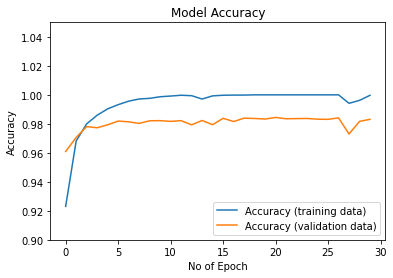

In [ ]:
# Plot history accuracy
%matplotlib inline
plt.ylim((0.9,1.05))
plt.plot(history.history['accuracy'],label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'],label='Accuracy (validation data)')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("No of Epoch")
plt.legend(loc="lower right")
plt.show()

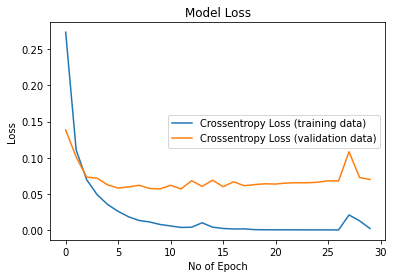

In [ ]:
# Plot history loss
%matplotlib inline
plt.plot(history.history['loss'],label='Crossentropy Loss (training data)')
plt.plot(history.history['val_loss'],label='Crossentropy Loss (validation data)')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("No of Epoch")
plt.legend(loc="center right")
plt.show()

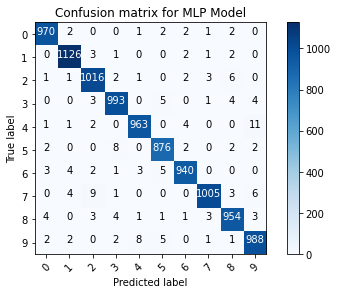

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix for MLP Model',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = mlp_model.predict(mlpX_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(mlpy_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

**Overview of the MLP layer**
*   From training the MLP model,it can be seen that the model accuracy is 98.31% and model error is 1.69%.From the learning curve,it can be seen that the model is overfiiting as the accuracy of the train set is higher than that of the validation set
*   From the confusion matrix,the MLP model performs well on all digits,However it has trouble with 1,2,3 as they are misclasssified as 7,5 respectively
*  Let's see the most important errors

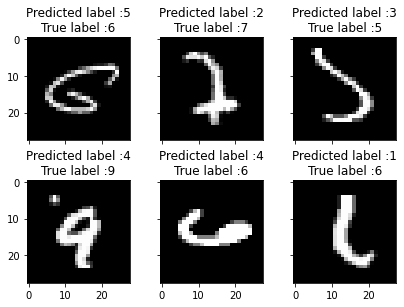

In [ ]:
# Display some error results 
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = mlpX_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    fig.tight_layout(h_pad=3)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)),cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

**From the figure above,it can be seen that the MLP model have trouble identifying these 6 numbers**


# Simple CNN Model

**We will be using a simple CNN to solve the prediction task for the MNIST dataset and increase the accuracy of the model and improve it further later on**
*   CNN are more complex than standard MLP and account for local connectivity
*   A CNN model is also better than MLP when it comes to image data as an input and perform better than them,Thus i will be using a CNN for this prediction task






In [ ]:
# I will copy the X_train,X_test,y_train and y_test for the Simple CNN Model
cnnX_train = X_train.copy()
cnnX_test = X_test.copy()
cnny_train = y_train.copy()
cnny_test = y_test.copy()

**Reshape**

In [ ]:
cnnX_train = cnnX_train.reshape(cnnX_train.shape[0], 28, 28,1).astype('float32')
cnnX_test = cnnX_test.reshape(cnnX_test.shape[0],  28, 28,1).astype('float32')

**Normalization**

In [ ]:
# Lets normalize our inputs from 0-255 to 0-1 to reduce the effect of illumination's differences
cnnX_train = cnnX_train / 255
cnnX_test = cnnX_test /255

**Encoding**

In [ ]:
# Let us one hot encode our outputs to one hot vectors
# Becuase our outputs are 10 digit numbers from 0 to 9
cnny_train = to_categorical(cnny_train)
cnny_test = to_categorical(cnny_test)
num_classes = cnny_test.shape[1]

**Building a simple CNN Model**

*   This CNN Model will be made up of 4 layers 
*   **First Layer:Convolutional Layer**
*   **Second Layer:Max Pooling Layer**
*   **Third Layer:Fully Connected Layer**
*   **Fourth Layer:Output Layer(softmax)**


In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (5, 5), input_shape=( 28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
# Compile model
cnn_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Fit the model
history = cnn_model.fit(cnnX_train, cnny_train, validation_data=(cnnX_test, cnny_test),epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores = cnn_model.evaluate(cnnX_test, cnny_test, verbose=0)
print("Model Accuracy %.2f%%" % ((scores[1]*100)))
print("Model Error %.2f%%" % (100-scores[1]*100))

Epoch 1/30
300/300 - 1s - loss: 0.2499 - accuracy: 0.9292 - val_loss: 0.0861 - val_accuracy: 0.9737
Epoch 2/30
300/300 - 1s - loss: 0.0769 - accuracy: 0.9769 - val_loss: 0.0533 - val_accuracy: 0.9826
Epoch 3/30
300/300 - 1s - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0455 - val_accuracy: 0.9843
Epoch 4/30
300/300 - 1s - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0376 - val_accuracy: 0.9867
Epoch 5/30
300/300 - 1s - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0358 - val_accuracy: 0.9876
Epoch 6/30
300/300 - 1s - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0342 - val_accuracy: 0.9879
Epoch 7/30
300/300 - 1s - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0352 - val_accuracy: 0.9880
Epoch 8/30
300/300 - 1s - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0331 - val_accuracy: 0.9888
Epoch 9/30
300/300 - 1s - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0332 - val_accuracy: 0.9889
Epoch 10/30
300/300 - 1s - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0343 - val_accuracy: 0.9887

**Plotting a learning curve**

In [ ]:
print("History Keys",history.history.keys())

History Keys dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


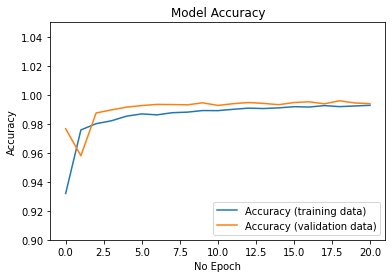

In [ ]:
# Plot history accuracy
%matplotlib inline
plt.ylim((0.9,1.05))
plt.plot(history.history['accuracy'],label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'],label='Accuracy (validation data)')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("No Epoch")
plt.legend(loc="lower right")
plt.show()

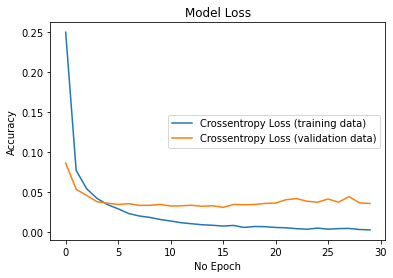

In [ ]:
# Plot history loss
%matplotlib inline
plt.plot(history.history['loss'],label='Crossentropy Loss (training data)')
plt.plot(history.history['val_loss'],label='Crossentropy Loss (validation data)')
plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("No Epoch")
plt.legend(loc="center right")
plt.show()

**Overview of the CNN Model**
*  From training the CNN model,it can be seen that the model accuracy is 99.02% and model error is 0.98%
*  From this it can be seen that there is an improvement of 0.71% and a 0.71% reduction in the error from the Simple MLP model
* I will be improving the accuracy of the model further on through the adoption of the LeNet-5 Architecture



# CNN Model using LeNet-5 Architecture
*   Now let us build a cnn model.I will be using the LeNet-5 CNN architecture to build the model
*   LeNet-5 Architecture
![picture](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

*   Input: Flattened 784px MNIST images which is represented as dimension (60000,28,28,1)
*   Output: Digits from (0-9)
*   Made up of 7 layers,consists of 3 convolutional layers,2 subsampling layers and 2 fully connected layers
*   **First Layer: Convolutional Layer (CONV1):**
*   **Second Layer: Average Pooling Layer (POOL1)**
*   **Third Layer: Convolutional Layer(CONV2)**
*   **Fourth Layer: Average Pooling Layer (POOL2)**
*   **Fifth Layer: Fully Connected Layer (FC1)**
*   **Sixth Layer: Fully Connected Layer (FC2)**
*   **Seventh Layer: Output layer(softmax)**

In [ ]:
# I will copy the X_train,X_test,y_train and y_test for the leNet-5 Model
lenetX_train = X_train.copy()
lenetX_test = X_test.copy()
lenety_train = y_train.copy()
lenety_test = y_test.copy()

**Reshape**

In [ ]:
lenetX_train = lenetX_train.reshape(lenetX_train.shape[0], 28, 28,1).astype('float32')
lenetX_test = lenetX_test.reshape(lenetX_test.shape[0],  28, 28,1).astype('float32')

**Normalization**

In [ ]:
# Lets normalize our inputs from 0-255 to 0-1 to reduce the effect of illumination's differences
lenetX_train = lenetX_train / 255
lenetX_test = lenetX_test /255

**Encoding**

In [ ]:
# Let us one hot encode our outputs to one hot vectors
# Becuase our outputs are 10 digit numbers from 0 to 9
lenety_train = to_categorical(lenety_train)
lenety_test = to_categorical(lenety_test)
num_classes = lenety_test.shape[1]

**Building the LeNet-5 model**

In [ ]:
# create model
lenet_model = Sequential()
lenet_model.add(Conv2D(6,kernel_size=5,padding='same',activation='sigmoid',input_shape=(28, 28, 1)))
lenet_model.add(AveragePooling2D(pool_size=2,strides=2))
lenet_model.add(Conv2D(filters=16, kernel_size=5,activation='sigmoid'))
lenet_model.add(AveragePooling2D(pool_size=2,strides=2))
lenet_model.add(Flatten())
lenet_model.add(Dense(120,activation='sigmoid'))
lenet_model.add(Dense(84,activation='sigmoid'))
lenet_model.add(Dense(num_classes,activation='softmax'))

# Compile Model
lenet_model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])
print(lenet_model.summary())

# Fit the model 
history = lenet_model.fit(lenetX_train,lenety_train,validation_data=(lenetX_test,lenety_test),epochs=30,
                          verbose=2)

# Final evaluation of the model
scores = lenet_model.evaluate(lenetX_test,lenety_test,verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

**Plotting a learning curve**

In [ ]:
print("History Keys",history.history.keys())

History Keys dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


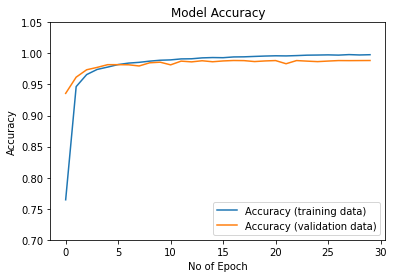

In [ ]:
# Plot history accuracy
%matplotlib inline
plt.ylim((0.7,1.05))
plt.plot(history.history['accuracy'],label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'],label='Accuracy (validation data)')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("No of Epoch")
plt.legend(loc="lower right")
plt.show()

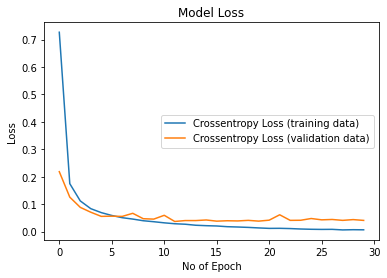

In [ ]:
# Plot history loss
%matplotlib inline
plt.plot(history.history['loss'],label='Crossentropy Loss (training data)')
plt.plot(history.history['val_loss'],label='Crossentropy Loss (validation data)')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("No of Epoch")
plt.legend(loc="center right")
plt.show()

**Overview of the Basic LeNet-5 Model**
* From training the lenet model after 15 epochs,the accuracy of the LeNet was 98.86% with an error rate of 1.14%.From the above learning curve it can be seen that the model did not overfit
* To improve the result,lets build a complex model with hyperparameter tuning,Dropout and Batch Normalization

# Hyperparameter tuning through RandomizedSearchCV and updating our model architecture


*  Our upgraded model will have 8 layers with Dropout and BatchNormalization
*   **First Layer: Convolutional Layer (CONV1):**
*   **Second Layer: Convolutional Layer(CONV2)**
*   **Second Layer: Pooling Layer (POOL1)**
*   **Third Layer: Convolutional Layer(CONV3)**
*   **Fourth Layer: Pooling Layer (POOL2)**
*   **Fifth Layer: Fully Connected Layer (FC1)**
*   **Sixth Layer: Fully Connected Layer (FC2)**
*   **Seventh Layer: Output layer(softmax)**


In [ ]:
# Create a model that will go through hyperparam tuning
# I will be tuning the pool_type,conv_activation and the dropout rate
def create_cnn_model(pool_type='max', conv_activation='sigmoid', dropout_rate=0.10):
    # create model
    model = Sequential()
    
    # first layer: convolution
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1))) 
    model.add(BatchNormalization())    

    model.add(Conv2D(48, kernel_size=(5, 5), activation=conv_activation))  
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))     
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation=conv_activation))   # 32   
    model.add(BatchNormalization())    
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))     
      
    # fourth series
    model.add(Flatten())         
    model.add(Dense(256, activation='relu')) # 64
    # add a dropout layer if rate is not null    
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate)) 
    model.add(Dense(84, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile( 
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return model
lenet = create_cnn_model()
lenet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 48)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          27712     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)         

In [ ]:
# # Lets add EarlyStopping to find the best possible score
# early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.1, patience = 5, verbose = 0)

# #Lets train the lenet model
# history = lenet.fit(
#     lenetX_train,
#     (lenety_train),
#     epochs=30,  
#     validation_data=(lenetX_test, (lenety_test)), 
#     batch_size=64,
#     callbacks = [early_stop]
# )

# model = KerasClassifier(build_fn=create_cnn_model, verbose=1)

# param_grid = {
#     'pool_type': ['max', 'average'],
#     'conv_activation': ['sigmoid', 'tanh','relu'],
#     'dropout_rate': [0.1,0.3,0.5], 
#     'epochs': [5]
# }

# random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3)
# random_result = random.fit(lenetX_train,(lenety_train))

# print('Best score obtained: {0}'.format(random_result.best_score_))
# print('Parameters:')
# for param, value in random_result.best_params_.items():
#     print('\t{}: {}'.format(param, value))

# **Lets use the best params from the random search into the final model**

**Lets also add early stopping and ReduceLROnPlateau which will reduce the learning rate when the model stops improving**

In [ ]:
# Best Params
# pool_type: max
# 	epochs: 5
# 	dropout_rate: 0.1
# 	conv_activation: relu

# Set a learning rate annealer
learning_rate_reduction =ReduceLROnPlateau(
                                            patience=20, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
# Set early stopping
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.1, patience = 20, verbose = 0)

final_model = create_cnn_model(pool_type='max',conv_activation='relu',dropout_rate=0.1)
history = final_model.fit(lenetX_train,lenety_train,validation_data=(lenetX_test,lenety_test),epochs=100,batch_size=64,callbacks=[early_stop,learning_rate_reduction])
score = final_model.evaluate(lenetX_test,lenety_test,verbose=0)
print("Final Model Accuracy: %.2f%%" % (scores[1]*100))
print("Final Model Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/100
938/938 [==============================] - 5s 6ms/step - loss: 0.1282 - accuracy: 0.9614 - val_loss: 0.0558 - val_accuracy: 0.9828
Epoch 2/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0354 - val_accuracy: 0.9877
Epoch 3/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0342 - val_accuracy: 0.9899
Epoch 4/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0376 - val_accuracy: 0.9898
Epoch 5/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.0263 - val_accuracy: 0.9920
Epoch 6/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0361 - val_accuracy: 0.9904
Epoch 7/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0289 - val_accuracy: 0.9930

In [ ]:
print("History Keys",history.history.keys())

History Keys dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


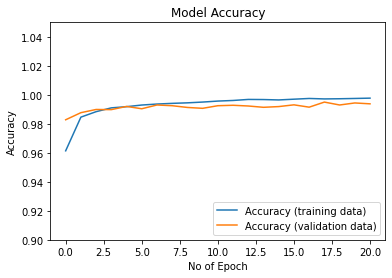

In [ ]:
# Plot history accuracy
%matplotlib inline
plt.ylim((0.9,1.05))
plt.plot(history.history['accuracy'],label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'],label='Accuracy (validation data)')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("No of Epoch")
plt.legend(loc="lower right")
plt.show()

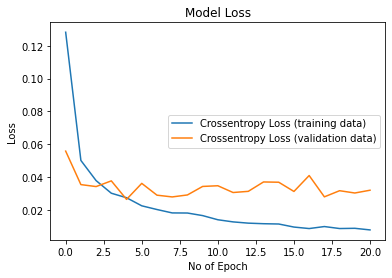

In [ ]:
# Plot history loss
%matplotlib inline
plt.plot(history.history['loss'],label='Crossentropy Loss (training data)')
plt.plot(history.history['val_loss'],label='Crossentropy Loss (validation data)')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("No of Epoch")
plt.legend(loc="center right")
plt.show()

**Overview of the final model**
*   For the final model, the accuracy of the model is 98.86% but the error has not reduced from the simple LeNet-5 model
*   Furthermore from the learning curve,it seems that some overfitting has occured
*   To solve this,i will use Data Augmentation which will create more data and reduce overfitting






# Final Model with Data Augmentation

In [ ]:
# Data Augmentation
dataGen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,  
    width_shift_range=0.1, 
    height_shift_range=0.1,
)
dataGen.fit(lenetX_train)

# Create a model with the best param from the random search
finalModelWDA = create_cnn_model(pool_type='max',conv_activation='relu',dropout_rate=0.1)

history = finalModelWDA.fit_generator(dataGen.flow(lenetX_train,lenety_train,batch_size=64),validation_data=(lenetX_test,lenety_test),epochs=100,steps_per_epoch=len(X_train)/64,callbacks=[learning_rate_reduction,early_stop])
score = finalModelWDA.evaluate(lenetX_test,lenety_test,verbose=0)
print("Final Model(After Image Augmentation): %.2f%%" % (score[1]*100))
print("Final Model (After Image Augmentation): %.2f%%" % (100-score[1]*100))

Epoch 1/100
938/937 [==============================] - 17s 18ms/step - loss: 0.2144 - accuracy: 0.9320 - val_loss: 0.0730 - val_accuracy: 0.9766
Epoch 2/100
938/937 [==============================] - 17s 18ms/step - loss: 0.0812 - accuracy: 0.9758 - val_loss: 0.1658 - val_accuracy: 0.9580
Epoch 3/100
938/937 [==============================] - 17s 18ms/step - loss: 0.0660 - accuracy: 0.9801 - val_loss: 0.0370 - val_accuracy: 0.9875
Epoch 4/100
938/937 [==============================] - 17s 19ms/step - loss: 0.0599 - accuracy: 0.9821 - val_loss: 0.0364 - val_accuracy: 0.9896
Epoch 5/100
938/937 [==============================] - 18s 19ms/step - loss: 0.0502 - accuracy: 0.9853 - val_loss: 0.0281 - val_accuracy: 0.9915
Epoch 6/100
938/937 [==============================] - 18s 19ms/step - loss: 0.0457 - accuracy: 0.9869 - val_loss: 0.0237 - val_accuracy: 0.9926
Epoch 7/100
938/937 [==============================] - 18s 19ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.0214 - val_ac

In [ ]:
print("History Keys",history.history.keys())

History Keys dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


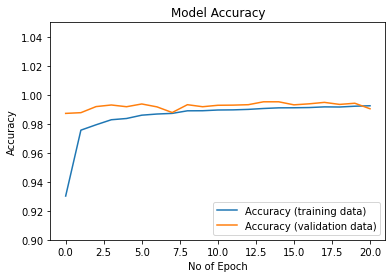

In [ ]:
# Plot history accuracy
%matplotlib inline
plt.ylim((0.9,1.05))
plt.plot(history.history['accuracy'],label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'],label='Accuracy (validation data)')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("No of Epoch")
plt.legend(loc="lower right")
plt.show()

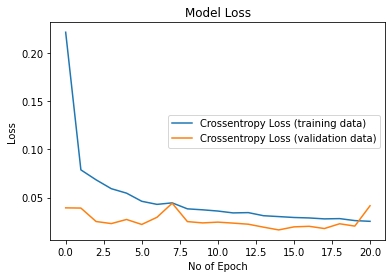

In [ ]:
# Plot history loss
%matplotlib inline
plt.plot(history.history['loss'],label='Crossentropy Loss (training data)')
plt.plot(history.history['val_loss'],label='Crossentropy Loss (validation data)')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("No of Epoch")
plt.legend(loc="center right")
plt.show()

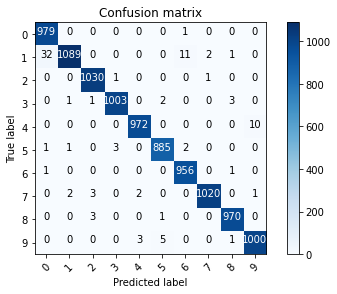

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = finalModelWDA.predict(lenetX_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(lenety_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

**Overview of the Final Model (With Image Augmentation)**
  *   From training the model with image augmentation after 21 after EarlyStopping.
  *   The accuracy of the Final Model has increased to 99.39% and the error has been reduced to 0.61$
  * From the learning curve,the final model did not overfit 
  * From the confusion matrix,the final model generally performs well on all digits with few error
  * It also seems that my model has some trouble identifying 7 as they are misclassified as 2



**Lets see the most important error**

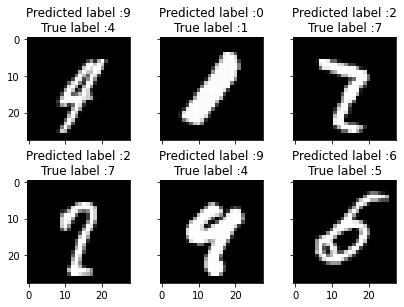

In [ ]:
# Display some error results 
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = lenetX_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    fig.tight_layout(h_pad=3)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)),cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

**From looking at the error,some of the errors also can be made by humans such as 7 which is similar to 2**

# Conclusion

**How is your prediction task defined? And what is the meaning of the
output variable?**

* The prediction task is defined as correctly identify digits from the MNIST dataset which contains tens of thousand of handwritten images
* The output variable is an integer form 0 to 9

**How do you represent your data as features?**

*  The data consist of 28*28 sized images which is flattened into 784 pixel input values.
*  The original data is in greyscale (0-255) which i normalized the values to black and white so that the CNN will easily identify it.

**Did you process the features in any way?**


*   I have done processing of the features through normalizing the inputs from 0-255 to 0-1 by dividing it by 255 
*   I have also reshaped the data to fit the convolutional neural network model
*   I have also one hot enocded our outputs to one hot vectors because the output variable are 10 digit numbers from 0 to 9



**How did you select which CNN architecture to use?**

*   I selected the LeNet-5 architecture through research online.Based on my research,I found out that the LeNet-5 is straightforward and easy to do compared to other CNN architecture like AlexNet,Inception and VGG-16
*  Furthermore the LeNet-5 can be easily optimised and upgraded to increase the accuracy.
*  The CNN architecture consists of a total of 7 layers consisting- 2 sets of Convolution layers and 2 sets of Average pooling layers which are followed by a flatten layer.After which we have 2 dense layers with a activation function of 'softmax'



**How do you evaluate the quality of your system?**


*   I evaluated the quality of my models through 2 learning curve.The first learning curve shows Training accuracy('accuracy") against the Validation accuracy ("val_accuracy").The second learning curve shows the Crossentropy loss of the training against the validation
*   From the learning curves,i can see whether the model overfits or underfits so that i can make the neccessary changes to the model.




**Can you say anything about the errors that the system makes?**

* I displayed the errors that the system makes through a confusion matrix.Based on the final model's confusion matrix,the model performs well on all digits with few errors with the exception of some digits
* My final model has trouble differentiating between (2 and 7),(1 and 2) and (8 and 6)


**Please show how you have improved the model from the initial
performance**

*   First i used a Multi Layer Perceptron for the dataset,however to improve the model accuracy further i used a Convolutional Neural Network because it is better at identifying images compared to MLP
*   Then i used a simple CNN model made up with 4 layers after which i used a CNN with the LeNet-5 architecture which improved the accuracy and reduced the error as it had 7 layers compared to the 4 layers of the CNN
*   To improve the model accuracy even further i used a Randomized Search to find the best parameters after which i added Batch normalisation,Learning rate reducer,earlystopping and a Droput layer 
*   Finally i added data augmentation which greatly improved my model accuracy even further and reduced the error

# References

*   [MNIST CNN](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)
*   [Understanding and Implementing LeNet-5 CNN Architecture (Deep Learning)](https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342)
*  [Review of LeNet-5: How to design the architecture of CNN](https://towardsdatascience.com/review-of-lenet-5-how-to-design-the-architecture-of-cnn-8ee92ff760ac)
* [Tune Hyperparameters for Classification Machine Learning Algorithms](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)
* [CNN Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet](https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)
